In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Carregar a imagem
img = cv2.imread('halteres.jpg')

In [3]:
# Transformar a imagem em um array 2D de pixels
Z = img.reshape((-1, 3))
Z = np.float32(Z)

In [4]:
# Critérios de parada, 10 e precisão igual a 1,0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 40

In [5]:
# Aplica o algoritmo kmeans
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)  # Converte os centros de float32 para uint8
res = center[label.flatten()]  # Acessa o valor do centro para cada píxel
res2 = res.reshape(img.shape)  # Remodela a imagem para o formato original

final = np.concatenate((img, res2), axis=1)  # Concatena as imagens originais e segmentadas

In [ ]:
# Mostra a imagem
cv2.imshow('Kmeans', final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Método Elbow para encontrar o número ideal de clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)  # Cria um objeto k-means
    kmeans.fit(Z)  # Treina o modelo
    distortions.append(kmeans.inertia_)  # Calcula a distorção

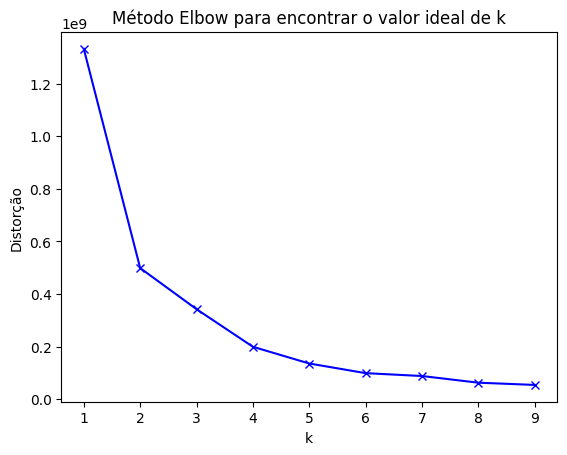

In [8]:
# Plota o gráfico
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Método Elbow para encontrar o valor ideal de k')
plt.show()

In [9]:
# Refazer o K-means com o número de clusters escolhido e seus vizinhos

k_ideal = 3

for k in range(k_ideal - 1, k_ideal + 3):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Z)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    num_cores_utilizadas = len(centroids)
    print("Número de clusters: %d" % k)
    print("Número de cores de halteres: %d" % num_cores_utilizadas)
    
    # Recriar a imagem com as cores agrupadas
    clustered_img = np.uint8(centroids[labels].reshape(img.shape))

    # Mostrar a imagem resultante
    cv2.imshow('K-means com {} clusters'.format(k), clustered_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Número de clusters: 2
Número de cores de halteres: 2
Número de clusters: 3
Número de cores de halteres: 3
Número de clusters: 4
Número de cores de halteres: 4
Número de clusters: 5
Número de cores de halteres: 5


In [10]:
# Imprimir a quantidade de cores realmente utilizadas na imagem
tuplas_unicas = set(map(tuple, Z))
num_cor_pixel_utilizada = len(tuplas_unicas)
print("Esta imagem utilizou %d combinações de cores RGB" % num_cor_pixel_utilizada)

Esta imagem utilizou 25389 combinações de cores RGB
